# Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore') 

In [2]:
%run statlearning.py

In [3]:
predata = pd.read_csv('train-1.csv',index_col = 'name')
predata_test = pd.read_csv('test-1.csv',index_col = 'name')
predata.head()

,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
name,,,,,,,,,,,,,,,,,,,,,
Brand New House with Private Bathroom Miranda,New house built in (Phone number hidden by Air...,Guests are welcomed to use all amenities avail...,New house built in (Phone number hidden by Air...,none,There’s a massive Westfield shopping centre ne...,"1, This is not the only room in the house bein...",Miranda train station is about 10-15 mins walk...,"Family area, living area, laundry area, backya...",I don’t personally live in the house anymore a...,NaN,...,f,strict_14_with_grace_period,f,f,4,0,4,0,4.35,$74.00
Single bedroom apartment in heart of Randwick,"Furnished, single bedroom apartment, Bedroom, ...",NaN,"Furnished, single bedroom apartment, Bedroom, ...",none,Randwick junction is at 5 minutes walk with al...,NaN,"Al the major bus stops to Sydney CBD, Bondi Be...",NaN,Host 'll be available 24/7 on call and nearby,NaN,...,f,strict_14_with_grace_period,f,f,1,0,1,0,NaN,$63.00
Couples stylish retreat 10 mins to Sydney city,Stylish Victorian terrace. 1 king size bed and...,"Bedroom king size bed ,bathroom, lounge, dinin...",Stylish Victorian terrace. 1 king size bed and...,none,"7 mins walk to train station, 1 stop to thrivi...",If staying on Sunday night please put garbage ...,"Parramatta road 2 minutes buses to everywhere,...",The whole house except for 2 private rooms.,"Available for questions by email, phone or text.",When leaving please strip bed put all used lin...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN,$176.00
Manly Retreat with Sweeping Harbour Views,This stunning coastal retreat is a few metres ...,2 Bedroom Scandinavian inspired beach apartmen...,This stunning coastal retreat is a few metres ...,none,Fairlight is a calm harbourside neighbourhood ...,NaN,A flat water beach with ocean pool is located ...,"Full apartment including balcony, washing mach...",Hosts are contactable via text message but may...,- No shoes inside - Be considerate of neighbou...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.33,$195.00
Cozy bedroom just 5 min walking to Dee Why beach,"Our place is a cozy and light apartment, just ...",If it's necessary we can let a extra kids matt...,"Our place is a cozy and light apartment, just ...",none,"Our building has just 8 suits, so it's pretty ...",NaN,"If you come by bus from Manly, you can get off...","We also offer all kitchen aplliance, beach cha...",NaN,"- Please, no shoes in the house",...,f,flexible,f,f,1,0,1,0,0.04,$51.00


In [4]:
data = predata.drop(columns=['summary','space', 'description','experiences_offered','neighborhood_overview','notes','transit','access','interaction','house_rules','host_id','host_about','host_neighbourhood','host_verifications','street','neighbourhood','neighbourhood_cleansed','zipcode','smart_location','amenities'])
train_data = data[ data['price'].str.contains('$')]
test_data = predata_test.drop(columns=['summary','space', 'description','experiences_offered','neighborhood_overview','notes','transit','access','interaction','house_rules','host_id','host_about','host_neighbourhood','host_verifications','street','neighbourhood','neighbourhood_cleansed','zipcode','smart_location','amenities'])

In [5]:
def convert_currency(value):
    new_value = value.replace(',', '').replace('$', '')
    return np.float(new_value)

In [6]:
price = train_data['price'].apply(convert_currency)
train_data['response_price'] = price

In [7]:
train_data['host_years'] = train_data.host_since.str[:4].astype(int)
test_data['host_years'] = test_data.host_since.str[:4].astype(int)
train_data['host_years']= 2020 - train_data.host_years
test_data['host_years']= 2020 - test_data.host_years

train_data.head()

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,city,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,response_price,host_years
name,,,,,,,,,,,,,,,,,,,,,
Brand New House with Private Bathroom Miranda,2015-12-05,"Miranda, New South Wales, Australia",within an hour,100%,100%,f,5.0,5.0,f,Miranda,...,f,f,4,0,4,0,4.35,$74.00,74.0,5
Single bedroom apartment in heart of Randwick,2017-03-15,AU,NaN,NaN,NaN,f,1.0,1.0,f,Randwick,...,f,f,1,0,1,0,NaN,$63.00,63.0,3
Couples stylish retreat 10 mins to Sydney city,2015-06-08,"Sydney, New South Wales, Australia",within an hour,100%,100%,t,2.0,2.0,f,Stanmore,...,f,f,1,1,0,0,NaN,$176.00,176.0,5
Manly Retreat with Sweeping Harbour Views,2017-02-08,"Sydney, New South Wales, Australia",NaN,NaN,NaN,f,1.0,1.0,f,Fairlight (Manly),...,f,f,1,1,0,0,0.33,$195.00,195.0,3
Cozy bedroom just 5 min walking to Dee Why beach,2015-01-06,"Sydney, New South Wales, Australia",NaN,NaN,NaN,f,1.0,1.0,f,Dee Why,...,f,f,1,0,1,0,0.04,$51.00,51.0,5


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10635 entries, Brand New House with Private Bathroom Miranda to 2-bedroom unit in quiet neighbourhood
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    10635 non-null  object 
 1   host_location                                 10623 non-null  object 
 2   host_response_time                            6163 non-null   object 
 3   host_response_rate                            6163 non-null   object 
 4   host_acceptance_rate                          7195 non-null   object 
 5   host_is_superhost                             10635 non-null  object 
 6   host_listings_count                           10635 non-null  float64
 7   host_total_listings_count                     10635 non-null  float64
 8   host_identity_verified                        10635 non-null  obj

# Exploratory data analysis

## Part A EDA on response variable

In [9]:
train_data['response_price'].describe()

count    10635.000000
mean       217.969535
std        269.453667
min         51.000000
25%         89.000000
50%        144.000000
75%        231.000000
max       5000.000000
Name: response_price, dtype: float64

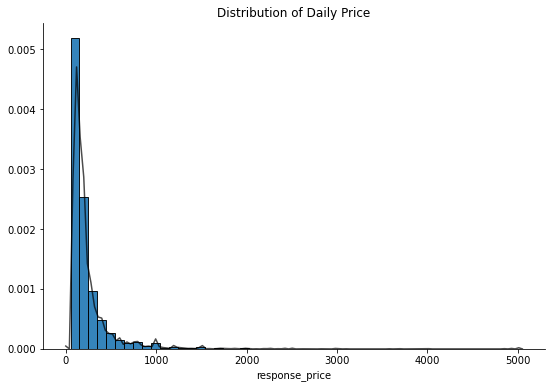

In [10]:
from statlearning import plot_dist
fig, ax  = plot_dist(train_data['response_price'])
ax.set_title('Distribution of Daily Price')
plt.show()

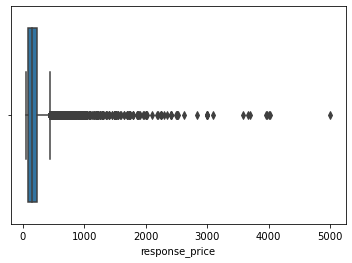

In [11]:
sns.boxplot(train_data['response_price'])

## Part B EDA on features with type 'int' and 'float'

In [12]:
train_data.corr()[['response_price']]

,response_price
host_listings_count,0.197540
host_total_listings_count,0.197540
latitude,0.203618
longitude,0.185439
accommodates,0.579667
bathrooms,0.539913
bedrooms,0.606002
beds,0.537508
square_feet,0.299606
weekly_discount,0.141973


In [13]:
int_float_features = list(train_data.iloc[:,[6,7,10,11,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,43,44,45,46,47,48,49,56,57,58,59,60,63]])

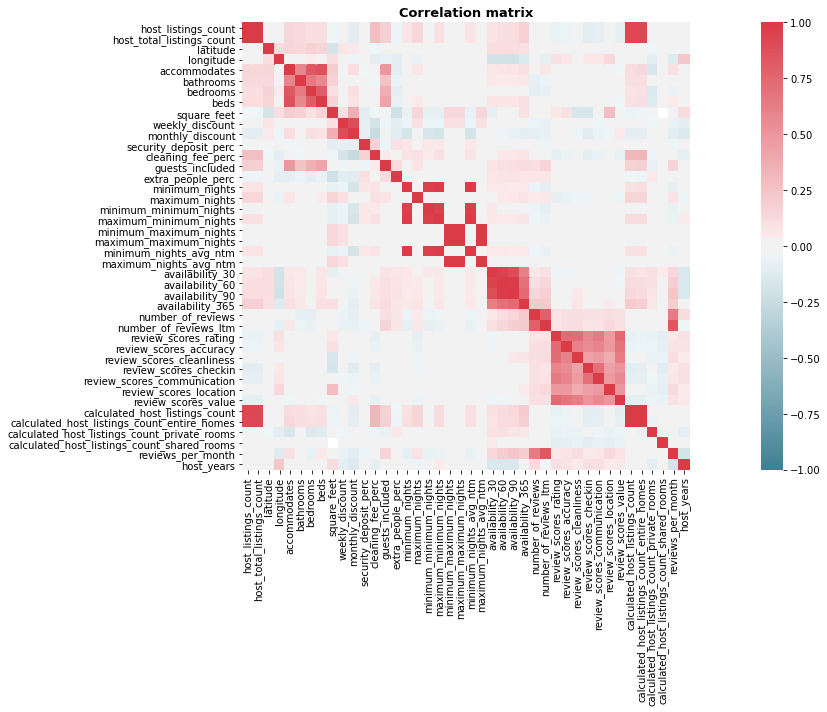

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_data[int_float_features].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()

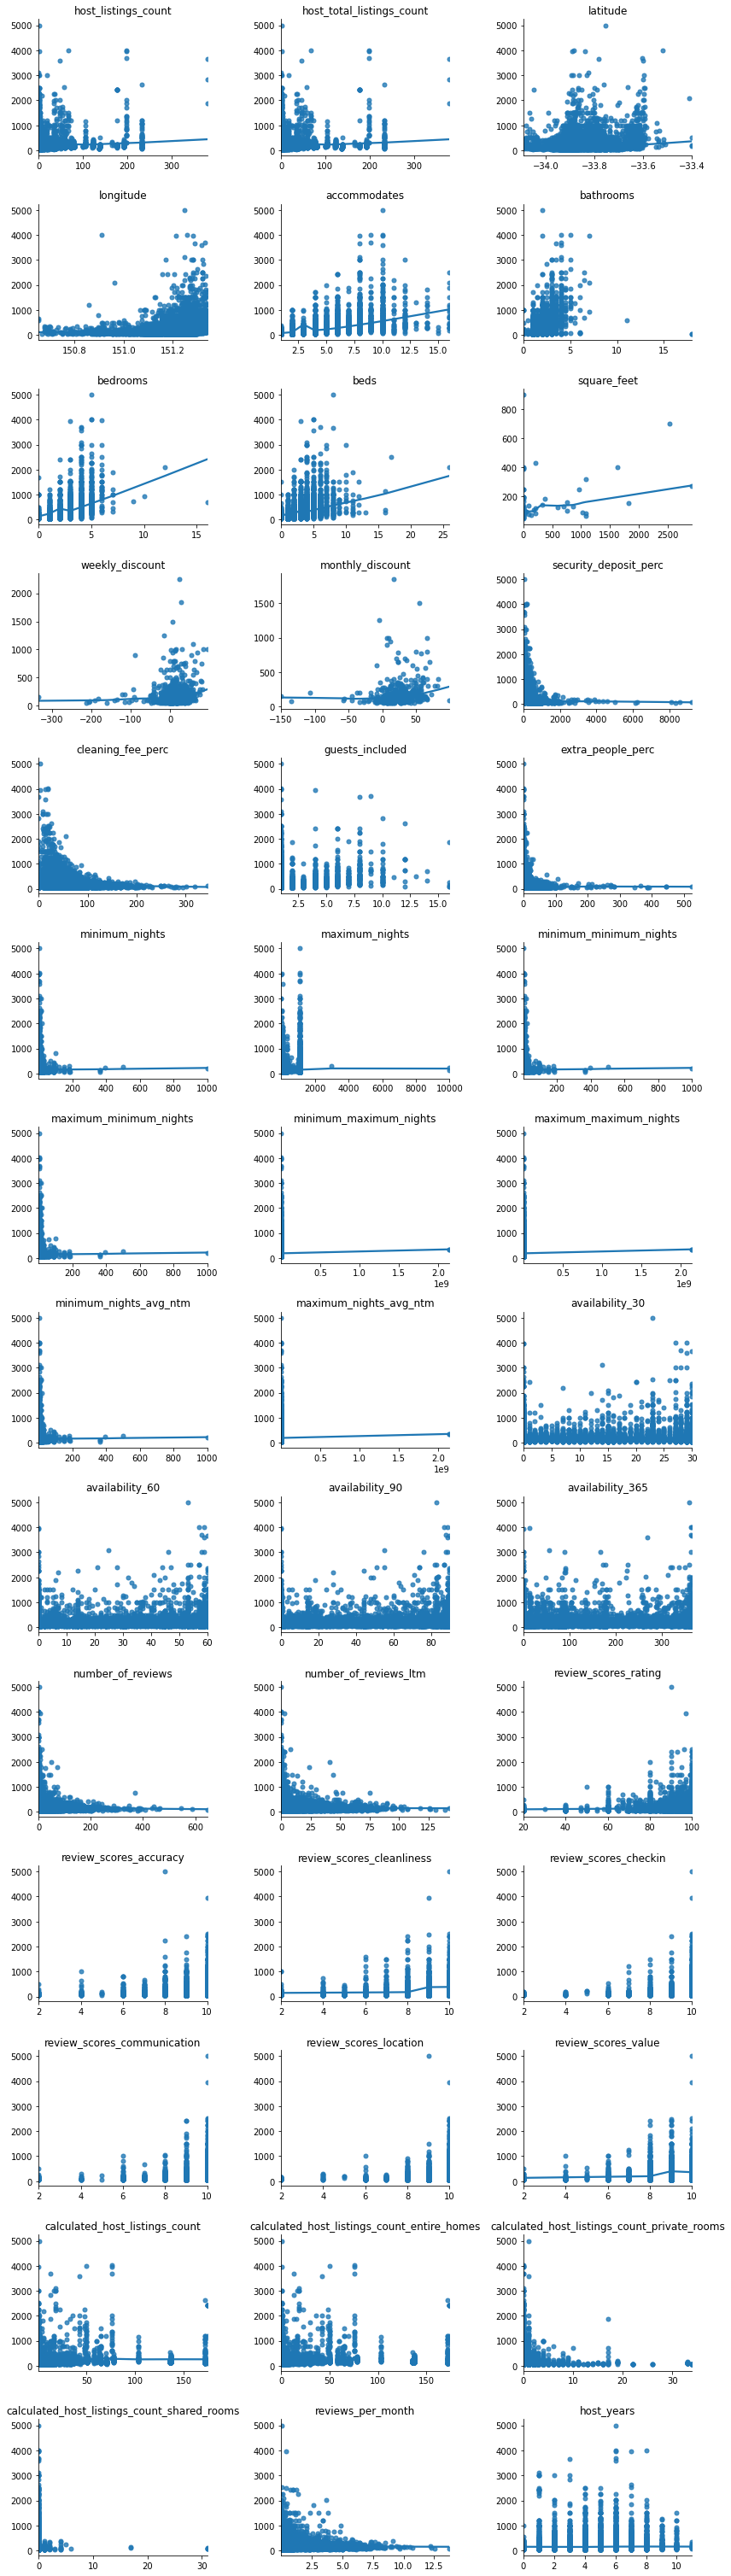

In [15]:
from statlearning import plot_regressions
plot_regressions(train_data[int_float_features], train_data['response_price'], lowess=True)
plt.show()

In [16]:
from statlearning import plot_dists
# plot_dists(train_data[int_float_features]) 
# plt.show()

## Part C EDA on features with type 'object '

In [17]:
object_features = list(train_data.iloc[:,[1,2,3,4,5,8,9,12,13,14,19,41,42,50,51,52,53,54,55]])
#exclude 1,9
#3,4,41,42 further consider in next section
object_features_EDA = list(train_data.iloc[:,[2,5,8,12,13,14,19,50,51,52,53,54,55]])

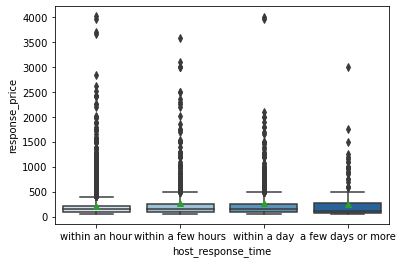

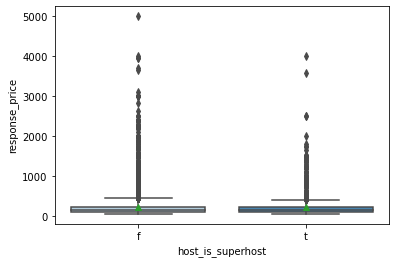

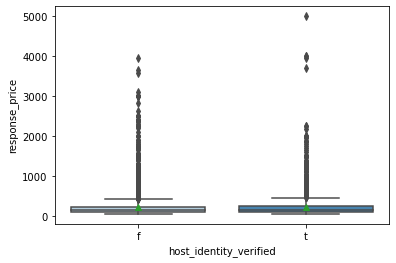

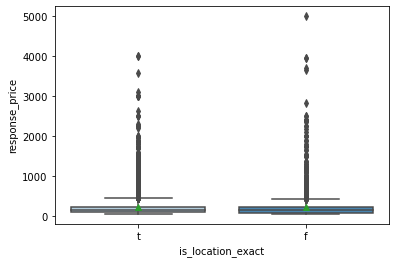

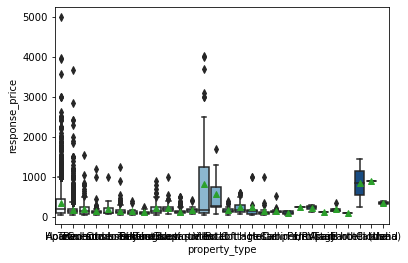

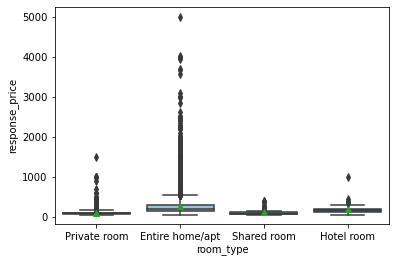

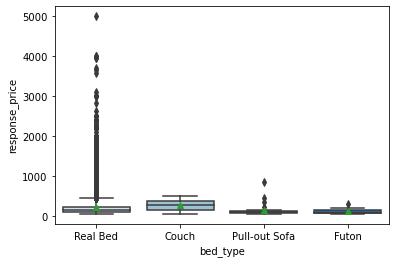

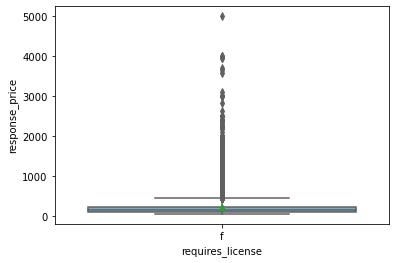

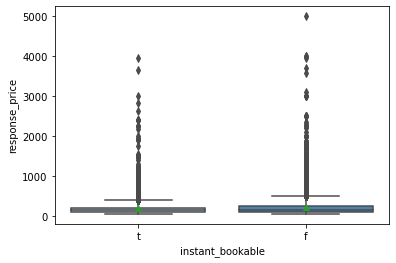

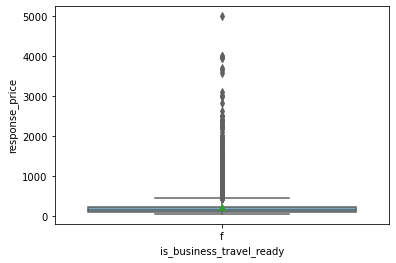

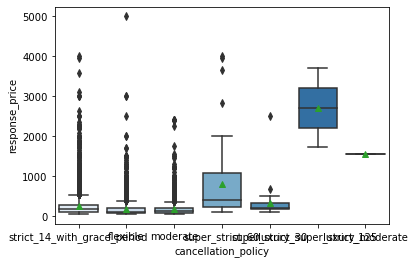

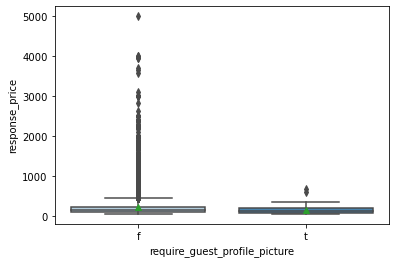

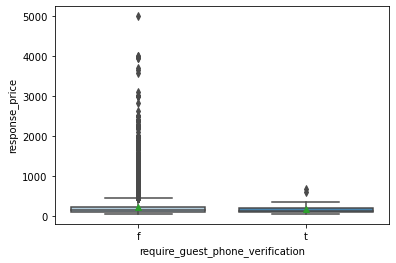

In [18]:
for i in range(13):
    ax = sns.boxplot(x=object_features_EDA[i], y='response_price', data=train_data, palette='Blues', showmeans=True)
    plt.show()

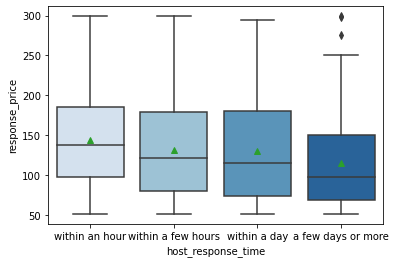

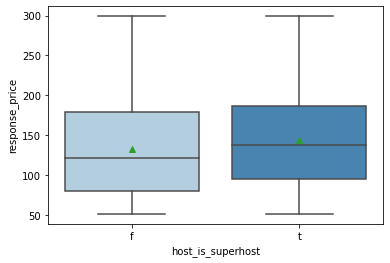

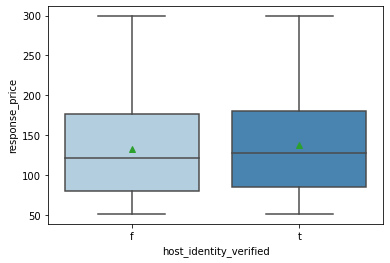

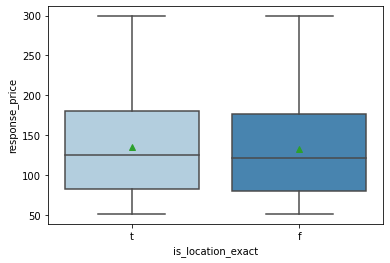

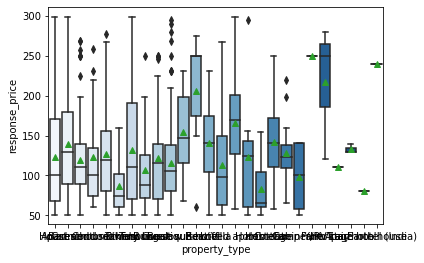

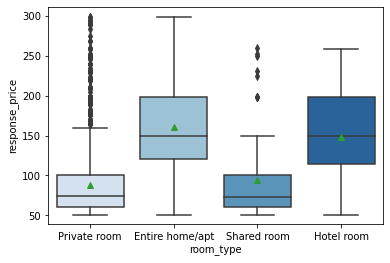

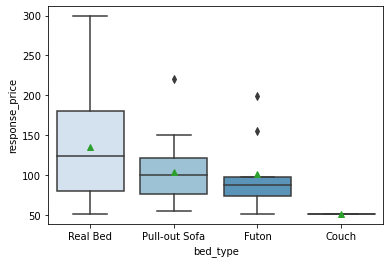

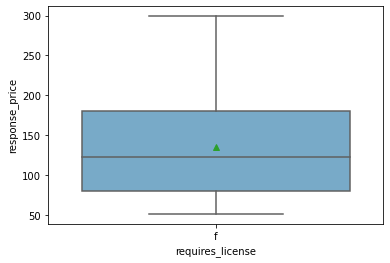

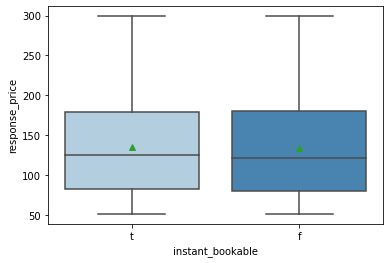

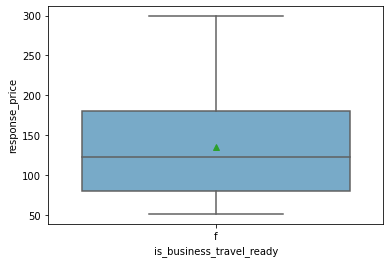

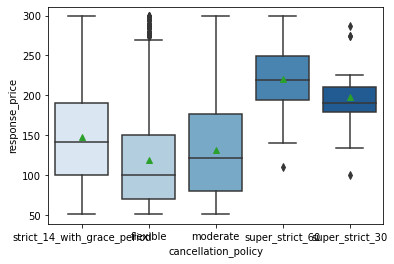

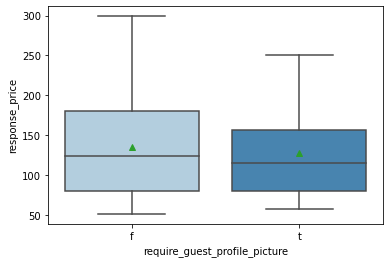

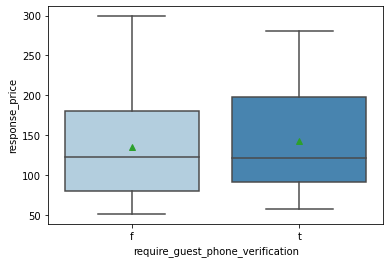

In [19]:
#just for visulization purpose
data2=train_data[abs(train_data['response_price'])<300]
for i in range(13):
    ax = sns.boxplot(x=object_features_EDA[i], y='response_price', data=data2, palette='Blues', showmeans=True)
    plt.show()

# Feature Engineering

## Feature Engineering for MODEL 1 (Benchmark model-linear regression) 

In [20]:
train_data_model_1 = train_data.copy()
train_data_model_1['response_price'] = np.log(train_data_model_1['response_price'])

In [21]:
test_data_model_1 = test_data.copy()

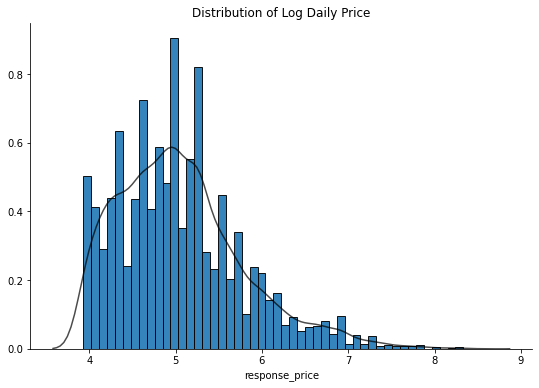

In [22]:
fig, ax  = plot_dist(train_data_model_1['response_price'])
ax.set_title('Distribution of Log Daily Price')
plt.show()

### Missing values

In [23]:
train_data_model_1[int_float_features].isnull().sum()

host_listings_count                                 0
host_total_listings_count                           0
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           3
bedrooms                                            8
beds                                               73
square_feet                                     10579
weekly_discount                                  9805
monthly_discount                                10138
security_deposit_perc                            3451
cleaning_fee_perc                                2510
guests_included                                     0
extra_people_perc                                   0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights      

In [24]:
train_data_model_1[object_features].isnull().sum()

host_location                         12
host_response_time                  4472
host_response_rate                  4472
host_acceptance_rate                3440
host_is_superhost                      0
host_identity_verified                 0
city                                  15
is_location_exact                      0
property_type                          0
room_type                              0
bed_type                               0
first_review                        2593
last_review                         2593
requires_license                       0
instant_bookable                       0
is_business_travel_ready               0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
dtype: int64

numercial data

In [25]:
#mode: bathrooms,bedrooms beds review_scores_accuracy  review_scores_cleanliness review_scores_checkin review_scores_communication  review_scores_location 
       #review_scores_value host_response_time response time

filling_numercial = ['bathrooms','bedrooms','beds','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

In [26]:
filling_numercial_mode = train_data_model_1[filling_numercial].mode()
filling_numercial_mode = filling_numercial_mode.iloc[0,:]
filling_numercial_mode

bathrooms                       1.0
bedrooms                        1.0
beds                            1.0
review_scores_accuracy         10.0
review_scores_cleanliness      10.0
review_scores_checkin          10.0
review_scores_communication    10.0
review_scores_location         10.0
review_scores_value            10.0
Name: 0, dtype: float64

In [27]:
train_data_model_1[filling_numercial] = train_data_model_1[filling_numercial].fillna(value = filling_numercial_mode)

In [28]:
test_data_model_1[filling_numercial] = test_data_model_1[filling_numercial].fillna(value = filling_numercial_mode)

In [29]:
#average: review_scores_rating
filling_numercial_2= ['review_scores_rating']
filling_numercial_mean = train_data_model_1[filling_numercial_2].mean()
filling_numercial_mean

review_scores_rating    93.485013
dtype: float64

In [30]:
train_data_model_1[filling_numercial_2] = train_data_model_1[filling_numercial_2].fillna(value = filling_numercial_mean)

In [31]:
test_data_model_1[filling_numercial_2] = test_data_model_1[filling_numercial_2].fillna(value = filling_numercial_mean)

In [32]:
#0:weekly_discount,monthly_discount,security_deposit_perc,cleaning_fee_perc,reviews_per_month
filling_numercial_3= ['weekly_discount','monthly_discount','security_deposit_perc','cleaning_fee_perc','reviews_per_month']
train_data_model_1[filling_numercial_3] = train_data_model_1[filling_numercial_3].fillna(value = 0)

In [33]:
filling_numercial_3= ['weekly_discount','monthly_discount','security_deposit_perc','cleaning_fee_perc','reviews_per_month']
test_data_model_1[filling_numercial_3] = test_data_model_1[filling_numercial_3].fillna(value = 0)

In [34]:
print(test_data['id'].value_counts())
print(test_data_model_1['id'].value_counts())

2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64
2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64


category

In [35]:
filling_categorical = ['host_response_time']
filling_categorical_mode = train_data_model_1[filling_categorical].mode()
filling_categorical_mode = filling_categorical_mode.iloc[0,:] 
train_data_model_1[filling_categorical] = train_data_model_1[filling_categorical].fillna(value = filling_categorical_mode)

In [36]:
test_data_model_1[filling_categorical] = test_data_model_1[filling_categorical].fillna(value = filling_categorical_mode)

In [37]:
train_data_model_1['host_response_rate'] = train_data_model_1['host_response_rate'].str.replace('%','').astype(float)
train_data_model_1['host_response_rate'] = train_data_model_1['host_response_rate'].fillna(value = 100.0)

In [38]:
test_data_model_1['host_response_rate'] = test_data_model_1['host_response_rate'].str.replace('%','').astype(float)
test_data_model_1['host_response_rate'] = test_data_model_1['host_response_rate'].fillna(value = 100.0)

In [39]:
print(test_data['id'].value_counts())
print(test_data_model_1['id'].value_counts())

2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64
2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64


In [40]:
train_data_model_1['host_response_rate'].describe()

count    10635.000000
mean        97.115374
std         13.184722
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

In [41]:
train_data_model_1['host_acceptance_rate'] = train_data_model_1['host_acceptance_rate'].str.replace('%','').astype(float)
train_data_model_1['host_acceptance_rate'] = train_data_model_1['host_acceptance_rate'].fillna(value = 100.0)

In [42]:
test_data_model_1['host_acceptance_rate'] = test_data_model_1['host_acceptance_rate'].str.replace('%','').astype(float)
test_data_model_1['host_acceptance_rate'] = test_data_model_1['host_acceptance_rate'].fillna(value = 100.0)

In [43]:
print(test_data['id'].value_counts())
print(test_data_model_1['id'].value_counts())

2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64
2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64


In [44]:
train_data_model_1['host_acceptance_rate']

name
Brand New House with Private Bathroom Miranda       100.0
Single bedroom apartment in heart of Randwick       100.0
Couples stylish retreat 10 mins to Sydney  city     100.0
Manly Retreat with Sweeping Harbour Views           100.0
Cozy bedroom just 5 min walking to Dee Why beach    100.0
                                                    ...  
Cosy Beach Apartment                                100.0
Large sunny ensuite bedroom                         100.0
Comfy Private Room Close to City and Airport          0.0
Stone’s Throw - Bondi                               100.0
2-bedroom unit in quiet neighbourhood               100.0
Name: host_acceptance_rate, Length: 10635, dtype: float64

In [45]:
train_data_model_1[object_features].isnull().sum()

host_location                         12
host_response_time                     0
host_response_rate                     0
host_acceptance_rate                   0
host_is_superhost                      0
host_identity_verified                 0
city                                  15
is_location_exact                      0
property_type                          0
room_type                              0
bed_type                               0
first_review                        2593
last_review                         2593
requires_license                       0
instant_bookable                       0
is_business_travel_ready               0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
dtype: int64

### Merge sparse categories

In [46]:
train_data_model_1['property_type'].value_counts()

Apartment                 6439
House                     2692
Townhouse                  451
Guest suite                216
Condominium                208
Guesthouse                 155
Villa                       75
Serviced apartment          63
Loft                        58
Bungalow                    51
Boutique hotel              48
Cottage                     42
Hostel                      21
Tiny house                  20
Cabin                       19
Bed and breakfast           19
Hotel                       14
Other                       14
Boat                        11
Aparthotel                   4
Camper/RV                    4
Farm stay                    3
Island                       2
Earth house                  2
Heritage hotel (India)       1
Castle                       1
Train                        1
Yurt                         1
Name: property_type, dtype: int64

In [47]:
dict1 = {'Apartment':['Apartment'],
         'House':['House'],
         'othercategory': ['Townhouse','Guest suite', 'Condominium','Guesthouse','Villa','Serviced apartment','Loft','Bungalow','Boutique hotel','Cottage','Hostel','Tiny house','Cabin','Bed and breakfast','Hotel','Other','Boat','Camper/RV','Aparthotel','Farm stay','Island','Earth house','Yurt','Castle','Train','Heritage hotel (India)']}
dict2 = {i: k for k, v in dict1.items() for i in v}
train_data_model_1['property_type'] = train_data_model_1['property_type'].replace(dict2)

In [48]:
test_data_model_1['property_type'].value_counts()

Apartment                 15180
House                      6219
Townhouse                  1017
Condominium                 488
Guest suite                 429
Guesthouse                  341
Loft                        162
Villa                       161
Cottage                     124
Serviced apartment          122
Bungalow                    115
Boutique hotel              106
Bed and breakfast            77
Hotel                        47
Other                        45
Cabin                        43
Hostel                       41
Tiny house                   29
Boat                         16
Camper/RV                    11
Tent                          9
Farm stay                     5
Earth house                   4
Barn                          4
Aparthotel                    4
Chalet                        4
Campsite                      2
Treehouse                     2
Resort                        2
Island                        2
Yurt                          1
Cave    

In [49]:
dict1_1 = {'Apartment':['Apartment'],
         'House':['House'],
         'othercategory':['Townhouse','Condominium','Guest suite','Guesthouse','Loft','Villa','Cottage','Serviced apartment','Bungalow','Boutique hotel','Bed and breakfast',
                          'Hotel','Other','Cabin','Hostel','Tiny house','Boat','Camper/RV','Tent','Farm stay','Earth house','Chalet','Barn','Aparthotel','Island','Resort',
                          'Treehouse','Campsite','Casa particular (Cuba)','Hut','Dome house','Yurt','Bus','Cave','Plane']}
dict2_1 = {i: k for k, v in dict1_1.items() for i in v}
test_data_model_1['property_type'] = test_data_model_1['property_type'].replace(dict2_1)

In [50]:
test_data_model_1['property_type'].value_counts()

Apartment        15180
House             6219
othercategory     3419
Name: property_type, dtype: int64

In [51]:
train_data_model_1['cancellation_policy'].value_counts()

strict_14_with_grace_period    4657
flexible                       3213
moderate                       2667
super_strict_60                  66
super_strict_30                  29
luxury_super_strict_125           2
luxury_moderate                   1
Name: cancellation_policy, dtype: int64

In [52]:
dict3 = {'strict_14_with_grace_period':['strict_14_with_grace_period'],
         'flexible':['flexible'],
         'moderate':['moderate'],
         'othercategory': ['super_strict_60', 'super_strict_30','luxury_super_strict_125','luxury_moderate']}
dict4 = {i: k for k, v in dict3.items() for i in v}
train_data_model_1['cancellation_policy'] = train_data_model_1['cancellation_policy'].replace(dict4)

In [53]:
train_data_model_1['cancellation_policy'].value_counts()

strict_14_with_grace_period    4657
flexible                       3213
moderate                       2667
othercategory                    98
Name: cancellation_policy, dtype: int64

In [54]:
test_data_model_1['cancellation_policy'].value_counts()

strict_14_with_grace_period    10887
flexible                        7645
moderate                        6077
super_strict_60                  130
super_strict_30                   72
luxury_moderate                    3
luxury_no_refund                   2
luxury_super_strict_125            1
strict                             1
Name: cancellation_policy, dtype: int64

In [55]:
dict3_1 = {'strict_14_with_grace_period':['strict_14_with_grace_period'],
         'flexible':['flexible'],
         'moderate':['moderate'],
         'othercategory': ['super_strict_60', 'super_strict_30','luxury_super_strict_125','luxury_moderate','luxury_no_refund','strict']}
dict4_1 = {i: k for k, v in dict3_1.items() for i in v}
test_data_model_1['cancellation_policy'] = test_data_model_1['cancellation_policy'].replace(dict4_1)

In [56]:
test_data_model_1['cancellation_policy'].value_counts()

strict_14_with_grace_period    10887
flexible                        7645
moderate                        6077
othercategory                    209
Name: cancellation_policy, dtype: int64

In [57]:
train_data_model_1['bed_type'].value_counts()

Real Bed         10595
Pull-out Sofa       28
Futon               10
Couch                2
Name: bed_type, dtype: int64

In [58]:
dict5 = {'Real Bed':['Real Bed'],
         'othercategory': ['Pull-out Sofa', 'Futon','Couch']}
dict6 = {i: k for k, v in dict5.items() for i in v}
train_data_model_1['bed_type'] = train_data_model_1['bed_type'].replace(dict6)

In [59]:
train_data_model_1['bed_type'].value_counts()

Real Bed         10595
othercategory       40
Name: bed_type, dtype: int64

In [60]:
test_data_model_1['bed_type'].value_counts()

Real Bed         24730
Pull-out Sofa       48
Futon               21
Airbed              10
Couch                9
Name: bed_type, dtype: int64

In [61]:
dict5_1 = {'Real Bed':['Real Bed'],
         'othercategory': ['Pull-out Sofa', 'Futon','Airbed','Couch']}
dict6_1 = {i: k for k, v in dict5_1.items() for i in v}
test_data_model_1['bed_type'] = test_data_model_1['bed_type'].replace(dict6_1)

In [62]:
test_data_model_1['bed_type'].value_counts()

Real Bed         24730
othercategory       88
Name: bed_type, dtype: int64

In [63]:
print(test_data['id'].value_counts())
print(test_data_model_1['id'].value_counts())

2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64
2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64


### Dummy

In [64]:
labels = ['host_response_time','host_is_superhost','host_identity_verified','is_location_exact','room_type','bed_type','requires_license',
          'instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','property_type']
          
print(test_data_model_1.shape)
    
dummies = pd.get_dummies(train_data_model_1[labels], drop_first= True)
train_data_model_1 = pd.concat([train_data_model_1, dummies], axis=1)
train_data_model_1 = train_data_model_1.drop(columns = labels, axis = 1)

dummies_test = pd.get_dummies(test_data_model_1[labels],drop_first= True)
test_data_model_1 = pd.concat([test_data_model_1, dummies_test], axis=1)

print(test_data_model_1.shape)
test_data_model_1 = test_data_model_1.drop(columns = labels, axis = 1)

print(test_data_model_1.shape)

(24818, 63)
(24818, 81)
(24818, 69)


In [65]:
train_data_model_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10635 entries, Brand New House with Private Bathroom Miranda to 2-bedroom unit in quiet neighbourhood
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_since                                       10635 non-null  object 
 1   host_location                                    10623 non-null  object 
 2   host_response_rate                               10635 non-null  float64
 3   host_acceptance_rate                             10635 non-null  float64
 4   host_listings_count                              10635 non-null  float64
 5   host_total_listings_count                        10635 non-null  float64
 6   city                                             10620 non-null  object 
 7   latitude                                         10635 non-null  float64
 8   longitude                          

### outlier

In [66]:
train_data_model_1['security_deposit_perc'] = train_data_model_1['security_deposit_perc']*0.01
test_data_model_1['security_deposit_perc'] = test_data_model_1['security_deposit_perc']*0.01

In [67]:
train_data_model_1['cleaning_fee_perc'] = train_data_model_1['cleaning_fee_perc']*0.1
test_data_model_1['cleaning_fee_perc'] = test_data_model_1['cleaning_fee_perc']*0.1

In [68]:
train_data_model_1.weekly_discount = np.where(train_data_model_1.weekly_discount > 0,train_data_model_1.weekly_discount,-train_data_model_1.weekly_discount)
test_data_model_1.weekly_discount = np.where(test_data_model_1.weekly_discount > 0,test_data_model_1.weekly_discount,-test_data_model_1.weekly_discount)

train_data_model_1.monthly_discount = np.where(train_data_model_1.monthly_discount > 0,train_data_model_1.monthly_discount,-train_data_model_1.monthly_discount)
test_data_model_1.monthly_discount = np.where(test_data_model_1.monthly_discount > 0,test_data_model_1.monthly_discount,-test_data_model_1.monthly_discount)

In [69]:
print(test_data['id'].value_counts())
print(test_data_model_1['id'].value_counts())

2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64
2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64


### Drop columns

In [70]:
train_data_model_1= train_data_model_1.drop(columns = ['square_feet','city','host_location','first_review','last_review','is_business_travel_ready','price','host_since'] )
test_data_model_1= test_data_model_1.drop(columns = ['square_feet','city','host_location','first_review','last_review','is_business_travel_ready','host_since'] )

In [71]:
response = 'response_price'
y_train_model_1 = train_data_model_1[response]
x_train_model_1 = train_data_model_1.drop(columns=response)

In [72]:
print(test_data['id'].value_counts())
print(test_data_model_1['id'].value_counts())

2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64
2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64


## Feature Engineering for MODEL 2 (Random Forest)

In [73]:
train_data_model_2 = train_data.copy()
test_data_model_2 = test_data.copy()

### Missing values

numercial

In [74]:
train_data_model_2[filling_numercial] = train_data_model_2[filling_numercial].fillna(value = filling_numercial_mode)

In [75]:
test_data_model_2[filling_numercial] = test_data_model_2[filling_numercial].fillna(value = filling_numercial_mode)

In [76]:
train_data_model_2[filling_numercial_2] = train_data_model_2[filling_numercial_2].fillna(value = filling_numercial_mean)

In [77]:
test_data_model_2[filling_numercial_2] = test_data_model_2[filling_numercial_2].fillna(value = filling_numercial_mean)

In [78]:
train_data_model_2[filling_numercial_3] = train_data_model_2[filling_numercial_3].fillna(value = 0)

In [79]:
test_data_model_2[filling_numercial_3] = test_data_model_2[filling_numercial_3].fillna(value = 0)

categorical data

In [80]:
train_data_model_2[filling_categorical] = train_data_model_2[filling_categorical].fillna(value = filling_categorical_mode)

In [81]:
test_data_model_2[filling_categorical] = test_data_model_2[filling_categorical].fillna(value = filling_categorical_mode)

In [82]:
train_data_model_2['host_response_rate'] = train_data_model_2['host_response_rate'].str.replace('%','').astype(float)
train_data_model_2['host_response_rate'] = train_data_model_2['host_response_rate'].fillna(value = 100.0)

In [83]:

test_data_model_2['host_response_rate'] = test_data_model_2['host_response_rate'].str.replace('%','').astype(float)
test_data_model_2['host_response_rate'] = test_data_model_2['host_response_rate'].fillna(value = 100.0)

In [84]:
train_data_model_2['host_acceptance_rate'] = train_data_model_2['host_acceptance_rate'].str.replace('%','').astype(float)
train_data_model_2['host_acceptance_rate'] = train_data_model_2['host_acceptance_rate'].fillna(value = 100.0)

In [85]:
test_data_model_2['host_acceptance_rate'] = test_data_model_2['host_acceptance_rate'].str.replace('%','').astype(float)
test_data_model_2['host_acceptance_rate'] = test_data_model_2['host_acceptance_rate'].fillna(value = 100.0)

### Merge sparse categories

In [86]:
dict1 = {'Apartment':['Apartment'],
         'House':['House'],
         'othercategory': ['Townhouse','Guest suite', 'Condominium','Guesthouse','Villa','Serviced apartment','Loft','Bungalow','Boutique hotel','Cottage','Hostel','Tiny house','Cabin','Bed and breakfast','Hotel','Other','Boat','Camper/RV','Aparthotel','Farm stay','Island','Earth house','Yurt','Castle','Train','Heritage hotel (India)']}
dict2 = {i: k for k, v in dict1.items() for i in v}
train_data_model_2['property_type'] = train_data_model_2['property_type'].replace(dict2)

In [87]:
dict1_1 = {'Apartment':['Apartment'],
         'House':['House'],
         'othercategory':['Townhouse','Condominium','Guest suite','Guesthouse','Loft','Villa','Cottage','Serviced apartment','Bungalow','Boutique hotel','Bed and breakfast',
                          'Hotel','Other','Cabin','Hostel','Tiny house','Boat','Camper/RV','Tent','Farm stay','Earth house','Chalet','Barn','Aparthotel','Island','Resort',
                          'Treehouse','Campsite','Casa particular (Cuba)','Hut','Dome house','Yurt','Bus','Cave','Plane']}
dict2_1 = {i: k for k, v in dict1_1.items() for i in v}
test_data_model_2['property_type'] = test_data_model_2['property_type'].replace(dict2_1)

In [88]:
dict3 = {'strict_14_with_grace_period':['strict_14_with_grace_period'],
         'flexible':['flexible'],
         'moderate':['moderate'],
         'othercategory': ['super_strict_60', 'super_strict_30','luxury_super_strict_125','luxury_moderate']}
dict4 = {i: k for k, v in dict3.items() for i in v}
train_data_model_2['cancellation_policy'] = train_data_model_2['cancellation_policy'].replace(dict4)

In [89]:
dict3_1 = {'strict_14_with_grace_period':['strict_14_with_grace_period'],
         'flexible':['flexible'],
         'moderate':['moderate'],
         'othercategory': ['super_strict_60', 'super_strict_30','luxury_super_strict_125','luxury_moderate','luxury_no_refund','strict']}
dict4_1 = {i: k for k, v in dict3_1.items() for i in v}
test_data_model_2['cancellation_policy'] = test_data_model_2['cancellation_policy'].replace(dict4_1)

In [90]:
dict5 = {'Real Bed':['Real Bed'],
         'othercategory': ['Pull-out Sofa', 'Futon','Couch']}
dict6 = {i: k for k, v in dict5.items() for i in v}
train_data_model_2['bed_type'] = train_data_model_2['bed_type'].replace(dict6)

In [91]:
dict5_1 = {'Real Bed':['Real Bed'],
         'othercategory': ['Pull-out Sofa', 'Futon','Airbed','Couch']}
dict6_1 = {i: k for k, v in dict5_1.items() for i in v}
test_data_model_2['bed_type'] = test_data_model_2['bed_type'].replace(dict6_1)

### Dummy

In [92]:
dummies_2 = pd.get_dummies(train_data_model_2[labels], drop_first= False)
train_data_model_2 = pd.concat([train_data_model_2, dummies_2], axis = 1)
train_data_model_2 = train_data_model_2.drop(columns = labels, axis = 1)

dummies_test_2 = pd.get_dummies(test_data_model_2[labels], drop_first= False)
test_data_model_2 = pd.concat([test_data_model_2, dummies_test_2], axis = 1)
test_data_model_2 = test_data_model_2.drop(columns = labels, axis = 1)

In [93]:
train_data_model_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10635 entries, Brand New House with Private Bathroom Miranda to 2-bedroom unit in quiet neighbourhood
Data columns (total 82 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_since                                       10635 non-null  object 
 1   host_location                                    10623 non-null  object 
 2   host_response_rate                               10635 non-null  float64
 3   host_acceptance_rate                             10635 non-null  float64
 4   host_listings_count                              10635 non-null  float64
 5   host_total_listings_count                        10635 non-null  float64
 6   city                                             10620 non-null  object 
 7   latitude                                         10635 non-null  float64
 8   longitude                          

### Drop columns

In [94]:
train_data_model_2= train_data_model_2.drop(columns = ['square_feet','city','host_location','first_review','last_review','is_business_travel_ready','price','host_since'] )
test_data_model_2= test_data_model_2.drop(columns = ['square_feet','city','host_location','first_review','last_review','is_business_travel_ready','host_since'] )

In [95]:
y_train_model_2 = train_data_model_2[response]
x_train_model_2 = train_data_model_2.drop(columns=response)

# Model

## Linear regression - benchmark

In [96]:
train_data_model_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10635 entries, Brand New House with Private Bathroom Miranda to 2-bedroom unit in quiet neighbourhood
Data columns (total 62 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_response_rate                               10635 non-null  float64
 1   host_acceptance_rate                             10635 non-null  float64
 2   host_listings_count                              10635 non-null  float64
 3   host_total_listings_count                        10635 non-null  float64
 4   latitude                                         10635 non-null  float64
 5   longitude                                        10635 non-null  float64
 6   accommodates                                     10635 non-null  int64  
 7   bathrooms                                        10635 non-null  float64
 8   bedrooms                           

In [97]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train_model_1, y_train_model_1)

LinearRegression()

In [98]:
print(test_data['id'].value_counts())
print(test_data_model_1['id'].value_counts())

2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64
2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64


In [99]:
x_test_data_model_1 = test_data_model_1.drop(columns='id')

In [100]:
print(test_data['id'].value_counts())
print(test_data_model_1['id'].value_counts())

2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64
2047     1
14962    1
2708     1
661      1
6806     1
        ..
17746    1
19795    1
5464     1
7513     1
0        1
Name: id, Length: 24818, dtype: int64


In [101]:
y_model_1_predict = LR.predict(x_test_data_model_1)

In [102]:
y_predict_1 = np.exp(y_model_1_predict)

In [103]:
reponse='price'

In [104]:
submission = pd.DataFrame(y_predict_1, index=test_data['id'],  columns=[response])
submission.rename(columns={'response_price': 'price'}, inplace=True) 
submission.head()

,price
id,
0,150.451996
1,484.998133
2,191.343429
3,93.566737
4,96.866405


In [105]:
submission.to_csv('Submission1.csv')

## Regression Tree

In [106]:
x_test_data_model_2 = test_data_model_2.drop(columns='id')

In [107]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor(min_samples_leaf=100)

modelRT = model_2.fit(x_train_model_2, y_train_model_2)

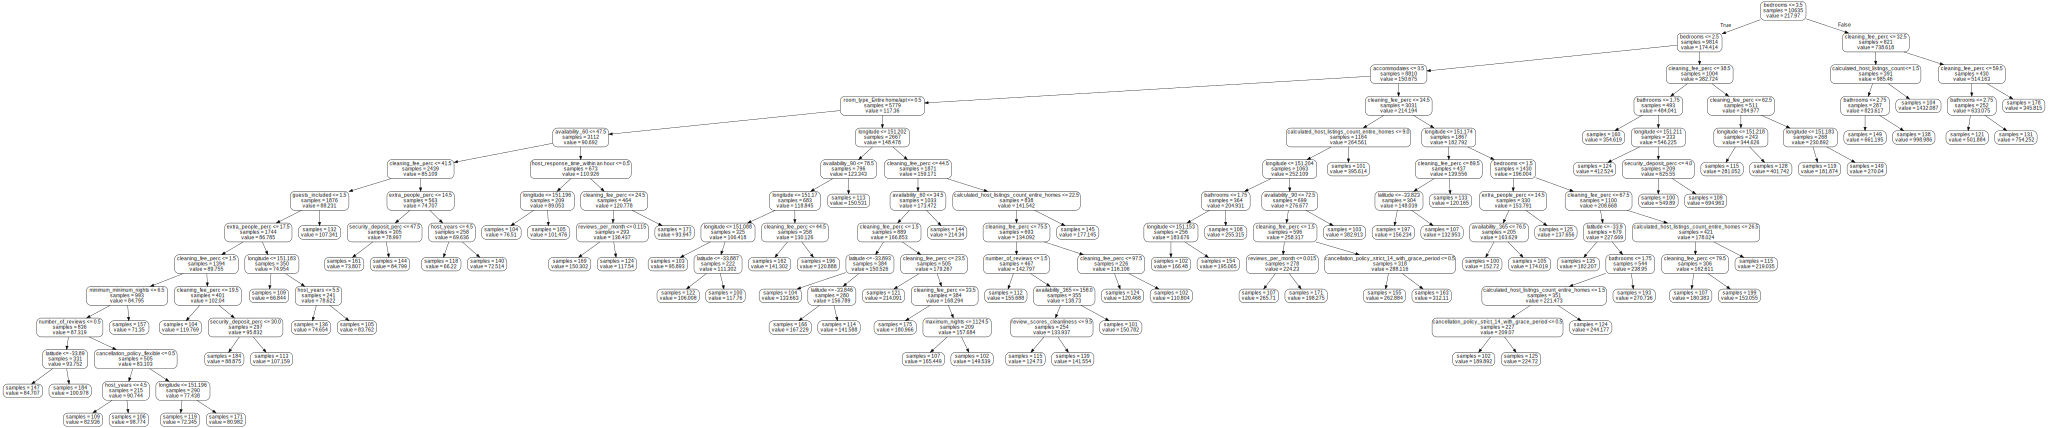

In [108]:
# change sample size
# new feature engineering
predictors = list(x_train_model_2.columns.values)

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/'

import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelRT, out_file=None , impurity=False, feature_names = predictors,
                           class_names=['stayed','left'], rounded=True) 
graph = graphviz.Source(dot_data)
graph

In [109]:
y_model_2_predict = modelRT.predict(x_test_data_model_2)

In [110]:
submission2 = pd.DataFrame(y_model_2_predict, index=test_data['id'],  columns=[response])
submission2.rename(columns={'response_price': 'price'}, inplace=True) 
submission2.head()

,price
id,
0,153.055276
1,661.194631
2,182.207407
3,98.773585
4,72.514286


In [111]:
submission2.to_csv('Submission2.csv')

In [112]:
# ID = test_data_model_1['id']
# predDf = pd.DataFrame(
#     {'id':ID,
#     'predicted price':y_model_2_predict})
# predDf.to_csv('kaggle_rt.csv',index=False)

## Bagginig

In [129]:
from sklearn.ensemble import BaggingRegressor
import time
start = time.time()
bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000, random_state=1)
bag.fit(x_train_model_2, y_train_model_2)
print('using time: ', time.time()-start, 's')

using time:  236.73893427848816 s


In [130]:
y_model_4_predict = bag.predict(x_test_data_model_2)

In [131]:
submission4 = pd.DataFrame(y_model_4_predict, index=test_data['id'],  columns=[response])
submission4.rename(columns={'response_price': 'price'}, inplace=True) 
submission4.head()

,price
id,
0,189.132
1,569.532
2,210.700
3,87.948
4,82.413


In [132]:
submission4.to_csv('Submission4.csv')

In [133]:
# ID = test_data_model_2['id']
# predDf = pd.DataFrame(
#     {'id':ID,
#     'price':y_model_4_predict})
# predDf.to_csv('kaggle_bagging.csv',index=False)

## Random Forest

In [119]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict

In [120]:
param_grid = {'n_estimators': np.arange(1,200,20),
              'max_depth': np.arange(1,20,5)} 

In [121]:
%%time

model = RandomForestRegressor(n_estimators = 1000)

param_grid = {'n_estimators': np.arange(1,200,20),
              'max_depth': np.arange(1,20,5)} 

rf_search = RandomizedSearchCV(model, param_grid, n_iter= 64, cv = 5, n_jobs = -1, 
                               random_state=1)
rf_search.fit(x_train_model_2, y_train_model_2)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 141, 'max_depth': 16} 

Wall time: 11min 2s


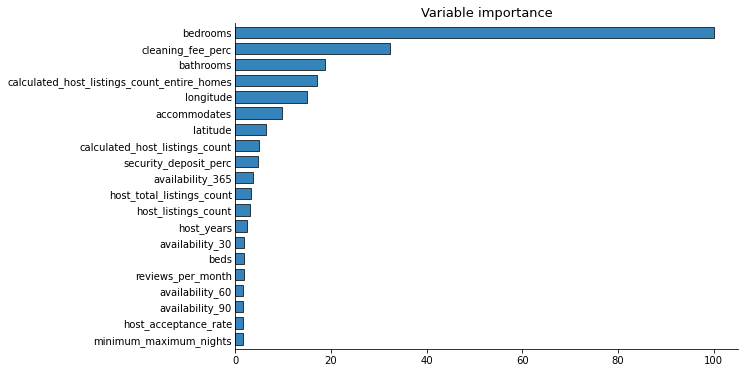

In [124]:
predictors_2 = list(x_train_model_2.columns.values)
from statlearning import plot_feature_importance
plot_feature_importance(rf_search.best_estimator_, predictors_2)
plt.show()

In [125]:
rf = RandomForestRegressor(max_depth=16, n_estimators=141)
RandomForest = rf.fit(x_train_model_2, y_train_model_2)

In [126]:
y_model_3_predict = rf.predict(x_test_data_model_2)

In [127]:
submission3 = pd.DataFrame(y_model_3_predict, index=test_data['id'],  columns=[response])
submission3.rename(columns={'response_price': 'price'}, inplace=True) 
submission3.head()

,price
id,
0,179.796600
1,556.930276
2,208.615170
3,87.767148
4,80.798472


In [128]:
submission3.to_csv('Submission3.csv')

In [ ]:
# ID = test_data_model_2['id']
# predDf = pd.DataFrame(
#     {'id':ID,
#     'price':y_model_3_predict})
# predDf.to_csv('kaggle_rf.csv',index=False)

## XGBoosting

In [135]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict

In [136]:
%%time

XG = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0)

tuning_parameters = {'n_estimators': np.arange(1,200,20),
              'max_depth': np.arange(1,20,5), } 

xbst = RandomizedSearchCV(XG, tuning_parameters, n_iter = 32, cv = 5, random_state=1, n_jobs=4)
XGboosting = xbst.fit(x_train_model_2, y_train_model_2)

print('Best parameters found by randomised search:', xbst.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 61, 'max_depth': 6} 

Wall time: 10min 10s


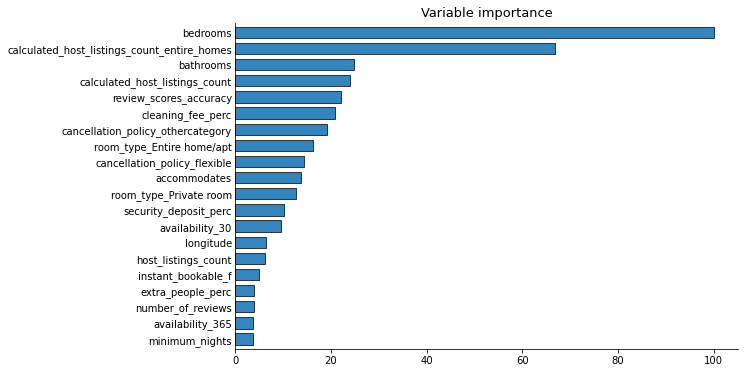

In [137]:
plot_feature_importance(xbst.best_estimator_,predictors)
plt.show()

In [140]:
XG = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=61, max_depth=6)
y_model_5_predict = xbst.predict(x_test_data_model_2)

In [141]:
submission5 = pd.DataFrame(y_model_5_predict, index=test_data['id'],  columns=[response])
submission5.rename(columns={'response_price': 'price'}, inplace=True) 
submission5.head()

,price
id,
0,155.964798
1,526.870483
2,194.032974
3,82.316689
4,82.469948


In [142]:
submission5.to_csv('Submission5.csv')

In [ ]:
# ID = test_data_model_2['id']
# predDf = pd.DataFrame(
#     {'id':ID,
#     'price':y_model_5_predict})
# predDf.to_csv('kaggle_xbst.csv',index=False)

## GAM

In [ ]:
from statlearning import GAM

In [ ]:
x_train_model_GAM = x_train_model_1.to_numpy()
y_train_model_GAM = y_train_model_1.to_numpy()
x_test_model_GAM = x_test_data_model_1.to_numpy()

In [ ]:
x_test_model_GAM.shape

In [ ]:
# %%time
#start = time.time()
model = GAM(smoother='local')
gam_local = model.fit(x_train_model_GAM, y_train_model_GAM)
#print('using time: ', time.time()-start, 's')

In [ ]:
y_model_6_predict = gam_local.predict(x_test_model_GAM)

In [ ]:
ID = test_data_model_1['id']
predDf = pd.DataFrame(
    {'id':ID,
    'price':y_model_6_predict})
predDf.to_csv('kaggle_gam.csv',index=False)

## Stacking

In [154]:
from mlxtend.regressor import StackingCVRegressor 

In [155]:
%%time

models = ['rf','xbst']

rf = RandomForestRegressor(max_depth=16, n_estimators=141)
xbst = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0, n_estimators=61, max_depth=6)
LR = LinearRegression()


np.random.seed(1)
stack = StackingCVRegressor(regressors=(rf ,xbst, LR), meta_regressor=LR)
stack.fit(x_train_model_2.values, y_train_model_2.ravel())


Wall time: 2min 19s


StackingCVRegressor(meta_regressor=LinearRegression(),
                    regressors=(RandomForestRegressor(max_depth=16,
                                                      n_estimators=141),
                                XGBRegressor(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, gamma=None,
                                             gpu_id=None,
                                             importance_type='gain',
                                             interaction_constraints=None,
                                             learning_rate=None,
                                             max_delta_step=None, max_depth=6,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
            

In [157]:
y_model_7_predict = stack.predict(x_test_data_model_2.values)

In [158]:
submission7 = pd.DataFrame(y_model_7_predict, index=test_data['id'],  columns=[response])
submission7.rename(columns={'response_price': 'price'}, inplace=True) 
submission7.head()

,price
id,
0,160.373770
1,552.558318
2,196.782858
3,82.549665
4,76.130618


In [159]:
submission7.to_csv('Submission7.csv')